## Clustering and Visualization

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [7]:
results = pd.DataFrame(df.describe())
results.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.00000
mean,86.064958,10711.114068,919.235741,57.821293,11295.684411,21970.517110,11212.646388,21888.836502,0.0,14240.34981
std,7.609654,10530.955700,1085.784789,60.654780,12022.056513,10652.170843,11963.759492,10619.703758,0.0,19226.72192
min,77.559000,1603.000000,0.000000,0.000000,1.000000,1923.000000,1.000000,1672.000000,0.0,1011.00000
25%,80.048000,1925.000000,142.000000,12.000000,16.000000,21577.000000,1.000000,21489.000000,0.0,2101.00000


In [9]:
corr = pd.DataFrame(df.corr())
print(corr)

                  % identity  alignment length  mismatches  gap opens  \
% identity          1.000000          0.631524   -0.453509  -0.535183   
alignment length    0.631524          1.000000    0.206680   0.136702   
mismatches         -0.453509          0.206680    1.000000   0.988180   
gap opens          -0.535183          0.136702    0.988180   1.000000   
q. start           -0.052519         -0.560720   -0.197306  -0.183211   
q. end              0.566794          0.355570   -0.021370  -0.074695   
s. start           -0.051870         -0.560761   -0.198956  -0.184782   
s. end              0.569653          0.359521   -0.022302  -0.075782   
evalue                   NaN               NaN         NaN        NaN   
bit score           0.793438          0.944639   -0.125766  -0.193226   

                  q. start    q. end  s. start    s. end  evalue  bit score  
% identity       -0.052519  0.566794 -0.051870  0.569653     NaN   0.793438  
alignment length -0.560720  0.355570 -0.

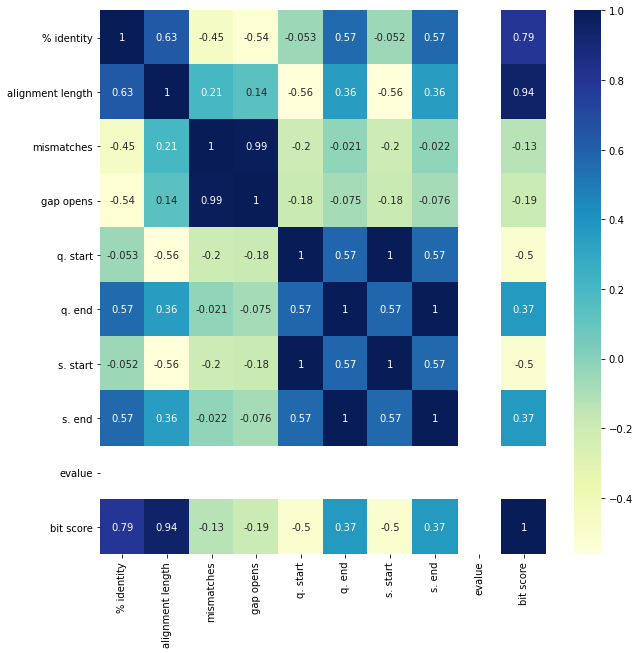

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [13]:
df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']]
pca = PCA(n_components=2)
pca.fit(df_numeric)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
components = pd.DataFrame(pca.components_)
components.columns = ['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
components.index =['Component 1', 'Component 2']

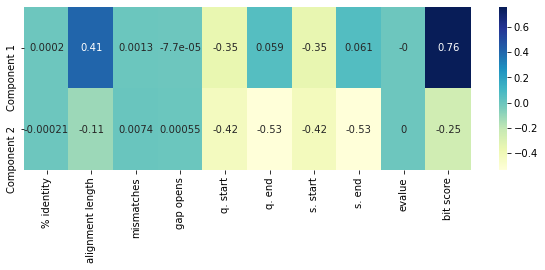

In [15]:
fig, ax = plt.subplots(figsize = (10,3))
sns.heatmap(components, annot = True, cmap = 'YlGnBu')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)

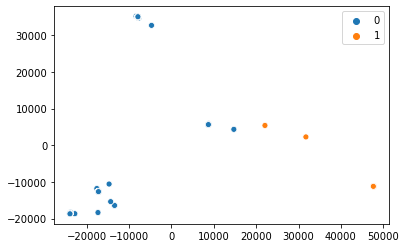

In [17]:
sns.scatterplot(x= pca.transform(df_numeric)[:, 0], y = pca.transform(df_numeric)[:, 1], hue = y_pred)